<a href="https://colab.research.google.com/github/koci1005/c-programming/blob/main/Diabetes%20Classifier%20detection%20(CSV%20Data)%20by%20ANN%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data_raw = diabetes.drop(['Pregnancies','Outcome'], axis = 1)

In [ ]:
# Replace 0 by np.nan
data_raw.replace(0, np.nan, inplace = True)

In [ ]:
data_raw.isnull().sum().sort_values()

,0
DiabetesPedigreeFunction,0
Age,0
Glucose,5
BMI,11
BloodPressure,35
SkinThickness,227
Insulin,374


## Handling Missing Values

In [ ]:
# If data is continious replace by 'mean' or 'median'| If data is discrete replace by 'median'| if data is categorical -> replace by 'mode'
data_raw['Insulin'].unique()

array([ nan,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 125., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18.,
       135., 495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,
        63., 284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,
        78., 130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87.,
       271., 129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680.,
       402., 258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,
        74., 182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85.,
       231.,  29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95.,
       237., 191., 328., 250., 480., 265., 193.,  7

In [ ]:
np.round(data_raw['Insulin'].mean())

156.0

In [ ]:
# Replace missing value by its mean
data_raw['Insulin'].replace(np.nan, np.round(data_raw['Insulin'].mean()), inplace = True)

<ipython-input-12-252f47b0cd25>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_raw['Insulin'].replace(np.nan, np.round(data_raw['Insulin'].mean()), inplace = True)


In [ ]:
data_raw.isnull().sum().sort_values()

,0
Insulin,0
DiabetesPedigreeFunction,0
Age,0
Glucose,5
BMI,11
BloodPressure,35
SkinThickness,227


In [ ]:
data_raw['SkinThickness'].unique()

array([35., 29., nan, 23., 32., 45., 19., 47., 38., 30., 41., 33., 26.,
       15., 36., 11., 31., 37., 42., 25., 18., 24., 39., 27., 21., 34.,
       10., 60., 13., 20., 22., 28., 54., 40., 51., 56., 14., 17., 50.,
       44., 12., 46., 16.,  7., 52., 43., 48.,  8., 49., 63., 99.])

In [ ]:
data_raw['BloodPressure'].unique()

array([ 72.,  66.,  64.,  40.,  74.,  50.,  nan,  70.,  96.,  92.,  80.,
        60.,  84.,  30.,  88.,  90.,  94.,  76.,  82.,  75.,  58.,  78.,
        68., 110.,  56.,  62.,  85.,  86.,  48.,  44.,  65., 108.,  55.,
       122.,  54.,  52.,  98., 104.,  95.,  46., 102., 100.,  61.,  24.,
        38., 106., 114.])

In [ ]:
data_raw['BMI'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  nan, 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [ ]:
data_raw['Glucose'].unique()

array([148.,  85., 183.,  89., 137., 116.,  78., 115., 197., 125., 110.,
       168., 139., 189., 166., 100., 118., 107., 103., 126.,  99., 196.,
       119., 143., 147.,  97., 145., 117., 109., 158.,  88.,  92., 122.,
       138., 102.,  90., 111., 180., 133., 106., 171., 159., 146.,  71.,
       105., 101., 176., 150.,  73., 187.,  84.,  44., 141., 114.,  95.,
       129.,  79.,  nan,  62., 131., 112., 113.,  74.,  83., 136.,  80.,
       123.,  81., 134., 142., 144.,  93., 163., 151.,  96., 155.,  76.,
       160., 124., 162., 132., 120., 173., 170., 128., 108., 154.,  57.,
       156., 153., 188., 152., 104.,  87.,  75., 179., 130., 194., 181.,
       135., 184., 140., 177., 164.,  91., 165.,  86., 193., 191., 161.,
       167.,  77., 182., 157., 178.,  61.,  98., 127.,  82.,  72., 172.,
        94., 175., 195.,  68., 186., 198., 121.,  67., 174., 199.,  56.,
       169., 149.,  65., 190.])

In [ ]:
# prompt: rewrite the code for feture Glucose, BMI, BloodPressure, SkinThickness "# Replace missing value by its mean
# data_raw['Insulin'].replace(np.nan, np.round(data_raw['Insulin'].mean()), inplace = True)"

# Replace missing values (represented by 0) with the mean for Glucose, BMI, BloodPressure, and SkinThickness
for col in ['Glucose', 'BMI', 'BloodPressure', 'SkinThickness']:
    data_raw[col].replace(np.nan, np.round(data_raw[col].mean()), inplace=True)


<ipython-input-18-9338c9d8271d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_raw[col].replace(np.nan, np.round(data_raw[col].mean()), inplace=True)


In [ ]:
data_raw.isnull().sum().sort_values()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0


#Imputer

Handles missing values. When multiple columns are having missing rows.

In [ ]:
from sklearn.impute import SimpleImputer
# stategy = 'median','mean','most_frequent'
impute = SimpleImputer(strategy = 'median')
data_array = impute.fit_transform(data_raw)

In [ ]:
data_array

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,  29.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,  29.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
diabetes_df = pd.DataFrame(data_array, columns = data_raw.columns)

In [ ]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diabetes_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,122.0,70.0,27.0,156.0,36.8,0.340,27.0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,126.0,60.0,29.0,156.0,30.1,0.349,47.0


In [ ]:
diabetes_df['Pregnancies'] = diabetes.Pregnancies
diabetes_df['Outcome'] = diabetes.Outcome

In [ ]:
diabetes_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,148.0,72.0,35.0,156.0,33.6,0.627,50.0,6,1
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0,1,0
2,183.0,64.0,29.0,156.0,23.3,0.672,32.0,8,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,0
4,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,0.171,63.0,10,0
764,122.0,70.0,27.0,156.0,36.8,0.340,27.0,2,0
765,121.0,72.0,23.0,112.0,26.2,0.245,30.0,5,0
766,126.0,60.0,29.0,156.0,30.1,0.349,47.0,1,1


# Data Augmentation
It is technique of increasing training set by creating modified copies of dataset using existing samples.

<Axes: xlabel='Outcome', ylabel='count'>

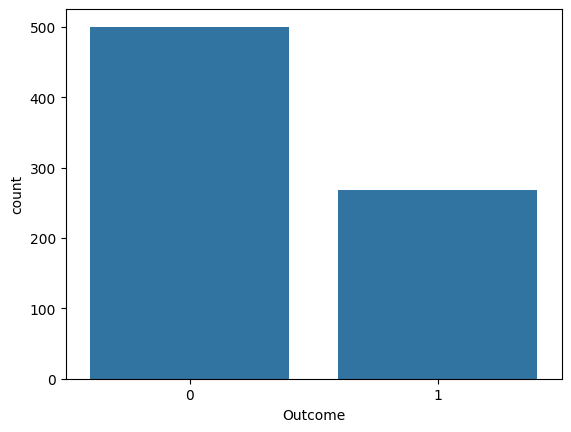

In [ ]:
# classes are imbalanced class
sns.countplot(x = "Outcome", data = diabetes_df)

In [ ]:
diabetes_df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
# Upsampling means | Resample using "bootstrapping" method just to generate samples | samples for each class
from sklearn.utils import resample
df_0 = diabetes_df[diabetes_df['Outcome'] == 0]
df_1 = diabetes_df[diabetes_df['Outcome'] == 1]

In [ ]:
# Apply Resampling
# n_samples = number of samples generated using existing sample in df_1
# Random-state is a seed numbur, it can be anything.
df_1_upsample = resample(df_1, n_samples = 500, replace = True, random_state = 123)

In [ ]:
# upsampling not can be increased but also can be dicresed | "bootstrapping" method can be used for increasing
diabetes_df1 = pd.concat([df_0, df_1_upsample])

In [ ]:
diabetes_df1.Outcome.value_counts()

,count
Outcome,
0,500
1,500


<ipython-input-34-3ef29e4482e9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=diabetes_df1, palette="bwr")


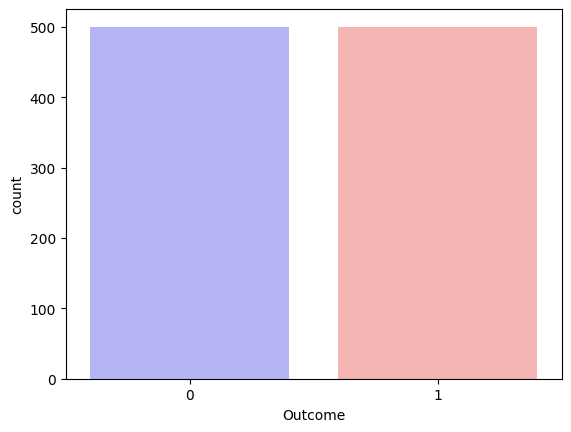

In [ ]:
sns.countplot(x="Outcome", data=diabetes_df1, palette="bwr")
plt.show()

In [ ]:
diabetes_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 110
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   1000 non-null   float64
 1   BloodPressure             1000 non-null   float64
 2   SkinThickness             1000 non-null   float64
 3   Insulin                   1000 non-null   float64
 4   BMI                       1000 non-null   float64
 5   DiabetesPedigreeFunction  1000 non-null   float64
 6   Age                       1000 non-null   float64
 7   Pregnancies               1000 non-null   int64  
 8   Outcome                   1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 78.1 KB


#Split Data into Features & Labels

In [ ]:
X = diabetes_df1.drop('Outcome', axis = 1)
Y = diabetes_df1['Outcome']

In [ ]:
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
1,85.0,66.0,29.0,156.0,26.6,0.351,31.0,1
3,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1
5,116.0,74.0,29.0,156.0,25.6,0.201,30.0,5
7,115.0,72.0,29.0,156.0,35.3,0.134,29.0,10
10,110.0,92.0,29.0,156.0,37.6,0.191,30.0,4
...,...,...,...,...,...,...,...,...
429,95.0,82.0,25.0,180.0,35.0,0.233,43.0,1
701,125.0,78.0,31.0,156.0,27.6,0.565,49.0,6
476,105.0,80.0,45.0,191.0,33.7,0.711,29.0,2
579,197.0,70.0,99.0,156.0,34.7,0.575,62.0,2


In [ ]:
Y

,Outcome
1,0
3,0
5,0
7,0
10,0
...,...
429,1
701,1
476,1
579,1


 # Splitting Data into Train & Test samples

In [ ]:
from sklearn.model_selection import train_test_split
# spliting of training & test is 80% to 20% ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# ANN Classification

In [ ]:
# Dense Neural Network
from tensorflow.keras.layers import Dense, Dropout
# Sequential Connection with Neural Network
from tensorflow.keras.models import Sequential
# Optimizers for Classification Model
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_model():
    # Sequential Neural Network - Feedforward Neural Network
    model = Sequential()
    # Units = Number of Neurons(2 * pow(n)) , Input Shape = Num of Features
    model.add(Dense(units = 64, activation = 'relu', input_shape = [len(X.keys())]))

    # Hidden Layer - I
    model.add(Dense(units = 128, activation = 'relu'))


    # Hidden Layer - II
    model.add(Dense(units = 128, activation = 'relu'))

    # Output Layer - For Binary Classification
    model.add(Dense(units = 1, activation = 'sigmoid'))

    # Optimizers (alpha)
    optimizers = Adam(learning_rate = 0.001)

    # Model Compiler
    # Error Function for binary classification = 'binary_crossentropy'
    # Metrics = Metrics of Model / Check the performance of model is Accuracy
    model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])

    return model

In [ ]:
model_1 = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,537 (99.75 KB)

 Trainable params: 25,537 (99.75 KB)

 Non-trainable params: 0 (0.00 B)

1. Number of Sampales is less than epoc is increase and Batch size is dicrease
2. Number of Sampales is large than epoc will be dicrease and Batch size will be increased

In [ ]:
# epochs = Num of Iterations | batch_size = sample size per iteration | validation split = 15% (test size)
# validation is done while training of model
history_1 = model_1.fit(x_train , y_train, epochs = 500, batch_size = 25, validation_split = 0.5)

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5182 - loss: 2.4434 - val_accuracy: 0.4700 - val_loss: 1.8292
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6302 - loss: 0.8934 - val_accuracy: 0.6500 - val_loss: 0.6770
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7130 - loss: 0.5920 - val_accuracy: 0.6325 - val_loss: 0.6785
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6038 - loss: 0.7658 - val_accuracy: 0.6575 - val_loss: 0.6595
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6859 - loss: 0.6287 - val_accuracy: 0.5450 - val_loss: 1.0120
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6007 - loss: 0.7858 - val_accuracy: 0.5450 - val_loss: 0.9593
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5576 - loss: 1.0756 - val_accuracy: 0.5625 - val_loss: 0.9772
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6634 - loss: 0.7352 - val_accuracy: 0.6250 - 

In [ ]:
history_1

In [ ]:
pd.DataFrame(history_1.history)

,accuracy,loss,val_accuracy,val_loss
0,0.5450,2.020468,0.4700,1.829213
1,0.6350,0.782493,0.6500,0.677031
2,0.6925,0.670938,0.6325,0.678473
3,0.6275,0.733949,0.6575,0.659470
4,0.6625,0.679812,0.5450,1.011993
...,...,...,...,...
495,0.9350,0.222493,0.7250,1.862545
496,0.9250,0.255329,0.7275,1.650514
497,0.9100,0.358775,0.6900,1.942797
498,0.9225,0.245111,0.7400,1.678835


<Axes: >

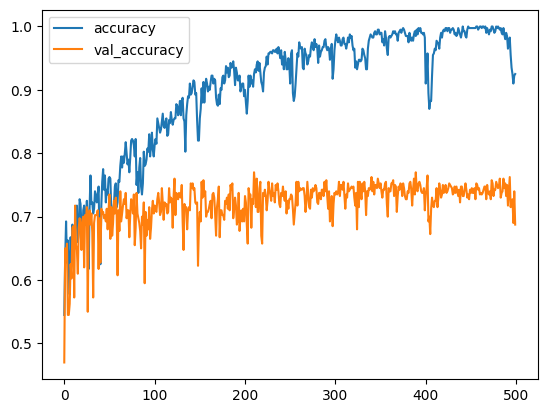

In [ ]:
pd.DataFrame(history_1.history)[['accuracy','val_accuracy']].plot()

<Axes: >

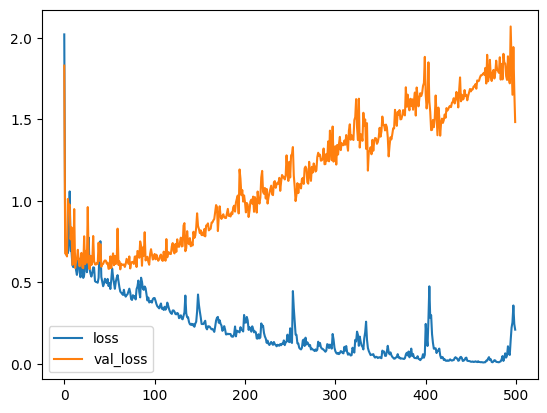

In [ ]:
pd.DataFrame(history_1.history)[['loss','val_loss']].plot()

# Scaling the Dataset

if the accuracy and validation of accuracy of data is very Gap that means model is overfitted | So Scaling must be applied |

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
x_train_scaler = scaler.fit_transform(x_train)

In [ ]:
x_train_scaler

array([[0.18709677, 0.26530612, 0.0326087 , ..., 0.07552199, 0.        ,
        0.06666667],
       [0.56774194, 0.57142857, 0.23913043, ..., 0.14393603, 0.38333333,
        0.2       ],
       [0.81935484, 0.48979592, 0.2826087 , ..., 0.05375389, 0.05      ,
        0.2       ],
       ...,
       [0.54193548, 0.44897959, 0.13043478, ..., 0.58329631, 0.06666667,
        0.        ],
       [0.76129032, 0.6122449 , 0.23913043, ..., 0.04620169, 0.55      ,
        0.66666667],
       [0.28387097, 0.51020408, 0.13043478, ..., 0.0670813 , 0.01666667,
        0.13333333]])

In [ ]:
x_test_scaled = scaler.transform(x_test)

In [ ]:
def build_model():
    # Sequential Neural Network - Feedforward Neural Network
    model = Sequential()
    # Units = Number of Neurons(2 * pow(n)) , Input Shape = Num of Features
    model.add(Dense(units = 64, activation = 'relu', input_shape = [len(X.keys())]))
    model.add(Dropout(0.2))

    # Dropout use for every Layer percentage of layer connection | dropout nural network- Google

    # Hidden Layer - I
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dropout(0.2))

    # Hidden Layer - II
    model.add(Dense(units = 128, activation = 'relu'))
    model.add(Dropout(0.3))

    # Output Layer - For Binary Classification
    model.add(Dense(units = 1, activation = 'sigmoid'))

    # Optimizers (alpha)
    optimizers = Adam(learning_rate = 0.001)

    # Model Compiler
    # Error Function for binary classification = 'binary_crossentropy'
    # Metrics = Metrics of Model / Check the performance of model is Accuracy
    model.compile(loss = 'binary_crossentropy', optimizer = optimizers, metrics = ['accuracy'])

    return model

In [ ]:
ANN_model_1 = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
ANN_model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,537 (99.75 KB)

 Trainable params: 25,537 (99.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 # epochs = Num of Iterations | batch_size = sample size per iteration | validation split = 15% (test size)
# validation is done while training of model
history_2 = ANN_model_1.fit(x_train_scaler , y_train, epochs = 500, batch_size = 25, validation_split = 0.2)

Epoch 1/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8779 - loss: 0.4340 - val_accuracy: 0.7625 - val_loss: 0.7885
Epoch 2/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8535 - loss: 0.4723 - val_accuracy: 0.7875 - val_loss: 0.5890
Epoch 3/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8792 - loss: 0.3157 - val_accuracy: 0.7688 - val_loss: 0.6293
Epoch 4/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8383 - loss: 0.3822 - val_accuracy: 0.7937 - val_loss: 0.5629
Epoch 5/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8872 - loss: 0.2816 - val_accuracy: 0.8062 - val_loss: 0.5476
Epoch 6/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8818 - loss: 0.3093 - val_accuracy: 0.8000 - val_loss: 0.5787
Epoch 7/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9148 - loss: 0.2305 - val_accuracy: 0.7875 - val_loss: 0.5597
Epoch 8/500
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8691 - loss: 0.2815 - val_accuracy: 0.7812 - 

In [ ]:
pd.DataFrame(history_2.history)

,accuracy,loss,val_accuracy,val_loss
0,0.870313,0.508263,0.76250,0.788482
1,0.854688,0.418199,0.78750,0.589007
2,0.881250,0.322278,0.76875,0.629332
3,0.857813,0.337967,0.79375,0.562865
4,0.867188,0.298714,0.80625,0.547602
...,...,...,...,...
495,0.968750,0.081510,0.83750,0.995743
496,0.968750,0.082958,0.84375,0.987472
497,0.965625,0.080551,0.85625,0.877024
498,0.970312,0.065244,0.83750,0.880405


<Axes: >

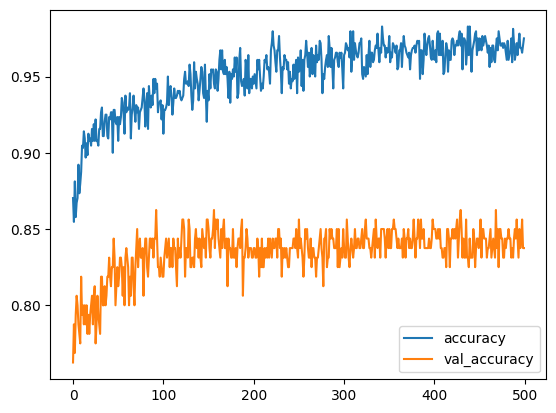

In [ ]:
pd.DataFrame(history_2.history)[['accuracy','val_accuracy']].plot()

<Axes: >

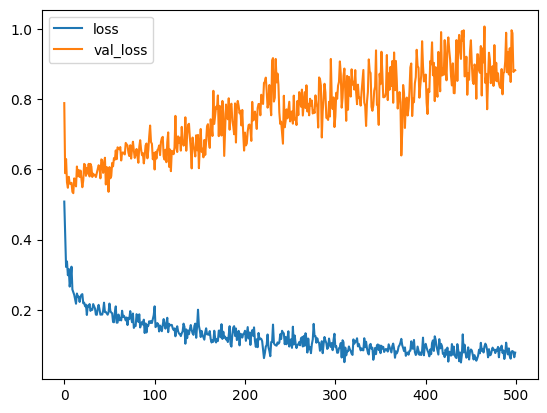

In [ ]:
pd.DataFrame(history_2.history)[['loss','val_loss']].plot()

In [ ]:
ANN_model_1.evaluate(x_test_scaled, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8679 - loss: 0.5025 


[0.5289437174797058, 0.8799999952316284]

# Classification Metrics

In [ ]:
predict = ANN_model_1.predict(x_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
predict

array([[1.00000000e+00],
       [9.99154091e-01],
       [1.39433488e-01],
       [9.97391105e-01],
       [9.96650279e-01],
       [9.99998212e-01],
       [9.92333770e-01],
       [9.96732473e-01],
       [5.67529649e-02],
       [1.99858259e-04],
       [9.94758248e-01],
       [2.04938099e-01],
       [9.91477549e-01],
       [8.04457605e-01],
       [9.97181237e-01],
       [9.99813437e-01],
       [1.99719988e-29],
       [9.74581659e-01],
       [5.36067367e-01],
       [1.21831781e-05],
       [9.99999285e-01],
       [1.84489354e-10],
       [6.74475431e-01],
       [9.88061965e-01],
       [1.75754838e-02],
       [2.56407648e-01],
       [1.20561206e-04],
       [9.97047722e-01],
       [9.74581659e-01],
       [9.97937560e-01],
       [8.36493819e-10],
       [9.71256930e-04],
       [8.55763912e-01],
       [3.74183422e-08],
       [9.76774842e-02],
       [6.87210709e-02],
       [9.95468557e-01],
       [9.98692095e-01],
       [9.80098963e-01],
       [9.84138548e-01],


In [ ]:
#Y hat (written ŷ ) is the predicted value of y (the dependent variable) in a regression equation
yhat = np.round(predict)

In [ ]:
yhat

array([[1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, yhat))

[[78 18]
 [ 6 98]]


<Axes: >

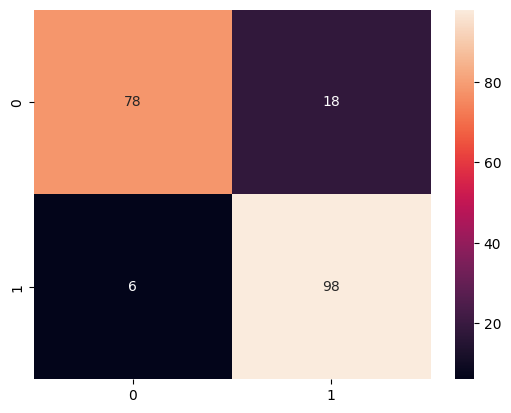

In [ ]:
#diagonal is correct prediction and non diagonal is False prediction
sns.heatmap(confusion_matrix(y_test, yhat), annot = True, fmt='0.0f')

In [ ]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        96
           1       0.84      0.94      0.89       104

    accuracy                           0.88       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200



In [ ]:
classification_report(y_test, yhat)

'              precision    recall  f1-score   support\n\n           0       0.93      0.81      0.87        96\n           1       0.84      0.94      0.89       104\n\n    accuracy                           0.88       200\n   macro avg       0.89      0.88      0.88       200\nweighted avg       0.89      0.88      0.88       200\n'

In [ ]:
# prompt: I want to see using dataframe "classification_report(y_test, yhat)
# "

#print(classification_report(y_test, yhat))
pd.DataFrame(classification_report(y_test, yhat, output_dict=True))


,0,1,accuracy,macro avg,weighted avg
precision,0.928571,0.844828,0.88,0.886700,0.885025
recall,0.812500,0.942308,0.88,0.877404,0.880000
f1-score,0.866667,0.890909,0.88,0.878788,0.879273
support,96.000000,104.000000,0.88,200.000000,200.000000


# ROC Curve
ROC Curve
Curve plotted b/w True Positive vs False Positive Rate

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# ROC - Receiver Operating Characteristic Curve
# AUC - Area under the curve, the closer AUC is to 1, the better is the model performance
fpr, tpr, _ = roc_curve(y_test, predict)
auc = roc_auc_score(y_test, predict)

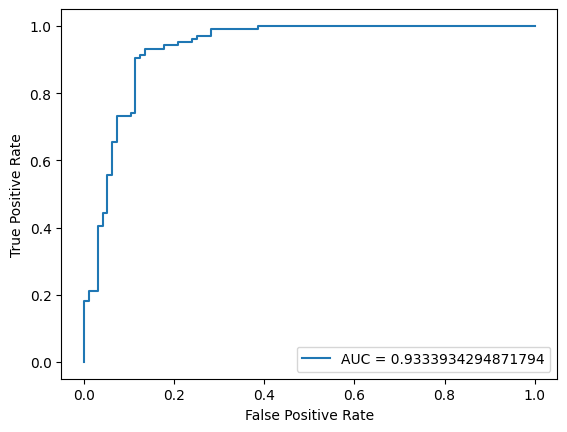

In [ ]:
plt.plot(fpr, tpr, label = "AUC = "+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
print(fpr)

[0.         0.         0.         0.         0.         0.
 0.01041667 0.01041667 0.01041667 0.03125    0.03125    0.03125
 0.03125    0.03125    0.03125    0.04166667 0.04166667 0.05208333
 0.05208333 0.05208333 0.05208333 0.0625     0.0625     0.0625
 0.0625     0.07291667 0.07291667 0.10416667 0.10416667 0.11458333
 0.11458333 0.11458333 0.11458333 0.125      0.125      0.13541667
 0.13541667 0.17708333 0.17708333 0.20833333 0.20833333 0.23958333
 0.23958333 0.25       0.25       0.28125    0.28125    0.38541667
 0.38541667 1.        ]
